# Report 2 -- NBA Role Player data analysis

In [220]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
import sklearn
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import sys
from pandas import Series, DataFrame

# read salary data

In [221]:
salary = pd.read_csv("salary18.csv")
salary_a = salary.sort_values(by = "season17_18", ascending = True)
salary_a.head()

,Unnamed: 0,Player,Tm,season17_18
572,573,Jarell Eddie,CHI,17224.0
571,572,Joel Bolomboy,MIL,22248.0
569,570,Chris Johnson,HOU,25000.0
567,568,Axel Toupane,NOP,25000.0
570,571,Beno Udrih,DET,25000.0


# find role player

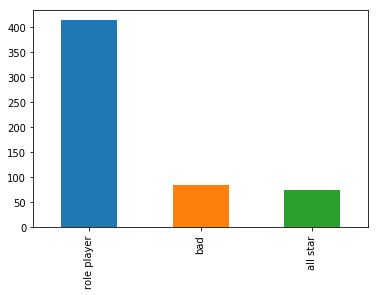

In [222]:
bins = [10000, 500000, 15000000, 50000000]
a = pd.cut(salary_a["season17_18"], bins = bins, labels = ["bad","role player","all star"])
a.value_counts().plot(kind = "bar")


# read NBA player stats 

In [223]:
stats = pd.read_csv("nbastat.csv")


In [224]:
l1 = list(stats["Player"])
statname = []


# delete repeated names

In [225]:
for each in l1:
    statname.append(each.split(sep = "\\")[0])

In [226]:
stats["Name"] = statname

In [227]:
repeats = []
test = stats
for i in range (1,664):
    if test.iloc[i,0] == test.iloc[i-1,0]:
        #print(i)
        repeats.append(i)

In [228]:
new = stats.drop(index = repeats)

In [229]:
salary_a.head()

,Unnamed: 0,Player,Tm,season17_18
572,573,Jarell Eddie,CHI,17224.0
571,572,Joel Bolomboy,MIL,22248.0
569,570,Chris Johnson,HOU,25000.0
567,568,Axel Toupane,NOP,25000.0
570,571,Beno Udrih,DET,25000.0


In [230]:
salary_a["Name"] = salary_a["Player"]

In [231]:
salary_a.head()

,Unnamed: 0,Player,Tm,season17_18,Name
572,573,Jarell Eddie,CHI,17224.0,Jarell Eddie
571,572,Joel Bolomboy,MIL,22248.0,Joel Bolomboy
569,570,Chris Johnson,HOU,25000.0,Chris Johnson
567,568,Axel Toupane,NOP,25000.0,Axel Toupane
570,571,Beno Udrih,DET,25000.0,Beno Udrih


In [232]:
salary_1 = salary_a.drop(['Player'],axis = 1)

# merge salary and stats by player's name

In [233]:
salary_2 = salary_1.rename(columns = {"Tm":"team"})


In [234]:
result = pd.merge(salary_2, new, how='inner', on=['Name'])

In [235]:
repeats2 = []

for i in range (0,513):
    if result.iloc[i,3] == result.iloc[i+1,3]:
        #print(i,result.iloc[i,3])
        repeats2.append(i)

In [236]:
result_v = result.drop(index = repeats2)

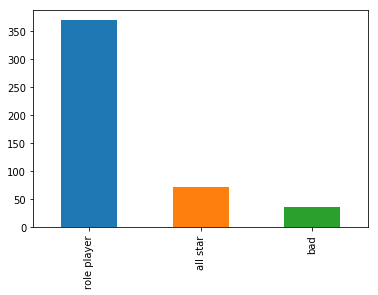

In [237]:
bins2 = [10000, 1000000, 15000000, 50000000]
temp = pd.cut(result_v["season17_18"], bins = bins, labels = ["bad","role player","all star"])
temp.value_counts().plot(kind = "bar")

# only keep role players

In [238]:
df3 = result_v.sort_values(by =  "season17_18", ascending = True)

In [239]:
df3 = df3.reset_index(drop=True)

In [240]:
t = []
for i in range (0,477):
    if (df3.iloc[i,2] < 1000000) or (df3.iloc[i,2]> 15000000):
        #print (i)
        t.append(i)
        

In [241]:
df4 = df3.drop(index = t)

In [242]:
df4 = df4.reset_index(drop = True)

# efficiency = ((Points + Rebounds + Assists + Steals + Blocks) - ((Field Goals Att. - Field Goals Made) + (Free Throws Att. - Free Throws Made) + Turnovers)).

In [243]:
effi = df4["PS/G"]+df4["TRB"]+df4["AST"]+df4["STL"]+df4["BLK"]-df4["FGA"]+df4["FG"]-df4["FTA"]+df4["FT"]-df4["TOV"]

In [244]:
df4["efficiency"] = effi

In [245]:
df5 = df4.rename(columns = {"season17_18":"salary"})

# dataset after cleaning

In [246]:
df5.head()

,Unnamed: 0,team,salary,Name,Rk,Player,Pos,Age,Tm,G,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G,efficiency
0,450,ORL,1050000.0,Wesley Iwundu,241,Wesley Iwundu\iwundwe01,SF,23,ORL,62,...,0.6,1.6,2.2,0.9,0.5,0.2,0.5,1.3,3.7,4.7
1,449,PHO,1069308.0,Isaiah Canaan,84,Isaiah Canaan\canaais01,PG-SG,26,TOT,20,...,0.3,2.0,2.3,3.8,0.8,0.1,1.5,1.8,8.6,9.5
2,447,NYK,1100000.0,Damyean Dotson,135,Damyean Dotson\dotsoda01,SG,23,NYK,44,...,0.2,1.7,1.9,0.7,0.3,0.0,0.4,0.8,4.1,4.4
3,446,BOS,1167333.0,Abdel Nader,363,Abdel Nader\naderab01,SF,24,BOS,48,...,0.3,1.2,1.5,0.5,0.3,0.2,0.7,0.9,3.0,2.4
4,445,SAC,1184385.0,Frank Mason,316,Frank Mason\masonfr01,PG,23,SAC,52,...,0.6,1.9,2.5,2.8,0.7,0.2,1.3,1.4,7.9,7.9


# test if there is a linear relationship between effiency and salary

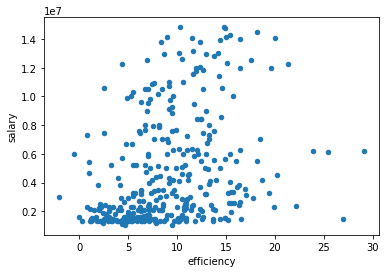

In [247]:
# a scatterplot 

df5.plot.scatter('efficiency', 'salary')

C:\Users\59381\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


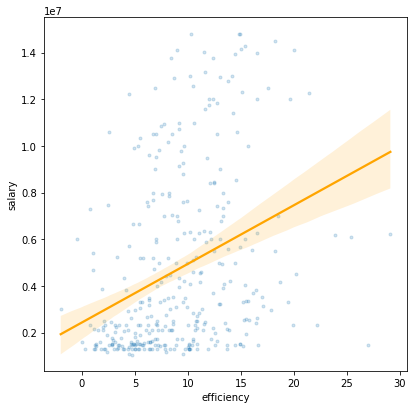

In [248]:
plt.subplots(figsize=(6.5, 6.5))
sns.regplot('efficiency', 'salary', data=df5, marker='.',
            scatter_kws={'alpha':'0.2'}, line_kws={'color':'orange'}, truncate=True)

# how to increase efficiency

# linear relationship FGA vs efficiency

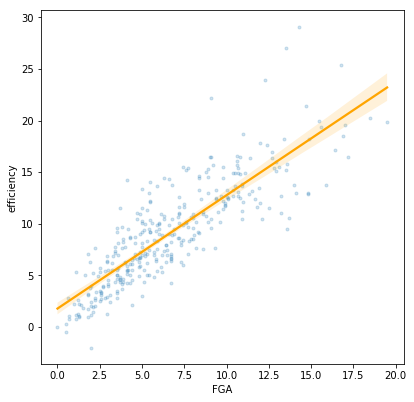

In [249]:
plt.subplots(figsize=(6.5, 6.5))
sns.regplot('FGA', 'efficiency', data=df5, marker='.',
            scatter_kws={'alpha':'0.2'}, line_kws={'color':'orange'}, truncate=True)

# Heatmap: FGA vs Mins and Games

In [250]:
bin4 = [0,5,10,15,20,25,30,35,40]

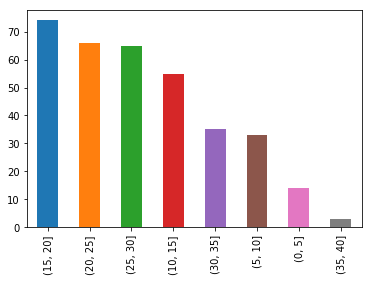

In [251]:
b = pd.cut(df5["MP"], bins = bin4)
b.value_counts().plot(kind = "bar")

In [257]:
df5["mins"] = b
df5.head()

,Unnamed: 0,team,salary,Name,Rk,Player,Pos,Age,Tm,G,...,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G,efficiency,mins
0,450,ORL,1050000.0,Wesley Iwundu,241,Wesley Iwundu\iwundwe01,SF,23,ORL,62,...,1.6,2.2,0.9,0.5,0.2,0.5,1.3,3.7,4.7,"(15, 20]"
1,449,PHO,1069308.0,Isaiah Canaan,84,Isaiah Canaan\canaais01,PG-SG,26,TOT,20,...,2.0,2.3,3.8,0.8,0.1,1.5,1.8,8.6,9.5,"(20, 25]"
2,447,NYK,1100000.0,Damyean Dotson,135,Damyean Dotson\dotsoda01,SG,23,NYK,44,...,1.7,1.9,0.7,0.3,0.0,0.4,0.8,4.1,4.4,"(10, 15]"
3,446,BOS,1167333.0,Abdel Nader,363,Abdel Nader\naderab01,SF,24,BOS,48,...,1.2,1.5,0.5,0.3,0.2,0.7,0.9,3.0,2.4,"(10, 15]"
4,445,SAC,1184385.0,Frank Mason,316,Frank Mason\masonfr01,PG,23,SAC,52,...,1.9,2.5,2.8,0.7,0.2,1.3,1.4,7.9,7.9,"(15, 20]"


In [259]:
bin5 = [0,10,20,30,40,50,60,70,80]

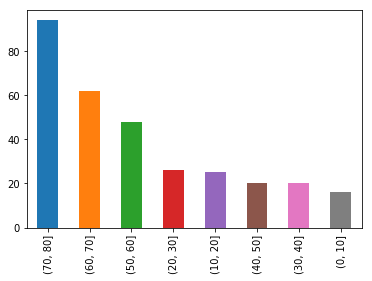

In [260]:
c = pd.cut(df5["G"], bins = bin5)
c.value_counts().plot(kind = "bar")

In [262]:
df5["games"] = c
df5.head()

,Unnamed: 0,team,salary,Name,Rk,Player,Pos,Age,Tm,G,...,TRB,AST,STL,BLK,TOV,PF,PS/G,efficiency,mins,games
0,450,ORL,1050000.0,Wesley Iwundu,241,Wesley Iwundu\iwundwe01,SF,23,ORL,62,...,2.2,0.9,0.5,0.2,0.5,1.3,3.7,4.7,"(15, 20]","(60, 70]"
1,449,PHO,1069308.0,Isaiah Canaan,84,Isaiah Canaan\canaais01,PG-SG,26,TOT,20,...,2.3,3.8,0.8,0.1,1.5,1.8,8.6,9.5,"(20, 25]","(10, 20]"
2,447,NYK,1100000.0,Damyean Dotson,135,Damyean Dotson\dotsoda01,SG,23,NYK,44,...,1.9,0.7,0.3,0.0,0.4,0.8,4.1,4.4,"(10, 15]","(40, 50]"
3,446,BOS,1167333.0,Abdel Nader,363,Abdel Nader\naderab01,SF,24,BOS,48,...,1.5,0.5,0.3,0.2,0.7,0.9,3.0,2.4,"(10, 15]","(40, 50]"
4,445,SAC,1184385.0,Frank Mason,316,Frank Mason\masonfr01,PG,23,SAC,52,...,2.5,2.8,0.7,0.2,1.3,1.4,7.9,7.9,"(15, 20]","(50, 60]"


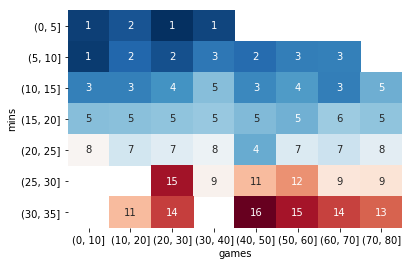

In [264]:
sns.heatmap(df5.groupby(['mins', 'games'])['FGA'].mean().unstack(),
            annot=True, cbar=False, fmt='.0f', cmap='RdBu_r')

The main idea of this analysis is through the stats data of NBA Role Players (Middle class) to see if there is a way to help them or how they should play during the game to increase their salary.

First I have to admit it is much harder than what I have imagined to analyze role player's data, I set player's salary range between 1000000 and 15000000 as role players. And there are many factors which might cause outliers. I would pay much more attention on Player's position, age, etc. in the next step.

For the result, I found there's vague linear relationship between player's efficiency with the salary. The efficiency formula is simple one fetched from NBA reference.com. So my goal turns to how to increase the efficiency through the playing style. After many attempts, I found there's clear linear relationship between efficiency and field goal attempts(FGA). And through the heatmap (FGA vs # of Games and Mins per Game), players who have more Mins playing and play 40 to 50 out of whole 80 games will own the most Field Goal Attempts. The time and games are possibly related to the strength of team or other factors, which I would like to step further during the remaining time.